In [2]:
!pip install jovian --quiet --upgrade
import jovian
jovian.commit(project = 'Course-Project')

<IPython.core.display.Javascript object>

[jovian] Creating a new project "sunskung/Course-Project"
[jovian] Committed successfully! https://jovian.ai/sunskung/course-project


'https://jovian.ai/sunskung/course-project'

# Course Project - Game Analysis

 This is exploratory data analysis which will be using the data from Kaggle. The data we will be using today is called video game sales which contain information like sales from NA, EU, JP ,etc regions , publishers and name of the game. We will be analyzing the data to find intersting information like the best selling games and the best performing publishers, also gather insights to conclude what is missing from the dataset. I will be using libray like Numpy, Pandas, Matplotlib and Seaborn to perform analysis and visualization.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**Steps** - First, we will be downloading dataset from kaggle into this jupyter notebook.

In [3]:
!pip install jovian opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

Let's begin by downloading the data, and listing the files within the dataset.

In [6]:
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales'

In [7]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sunchaw
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 111MB/s]

In [ ]:
jovian.commit(files=['videogamesales'])

<IPython.core.display.Javascript object>

In [1]:
import os
import pandas as pd

In [2]:
os.listdir('./videogamesales')

['vgsales.csv']

In [3]:
game_df = pd.read_csv('videogamesales/vgsales.csv')

## Data Preparation and Cleaning

**Steps** - We will be cleaning some outliers and missing information from the dataset.



In [11]:
game_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [24]:
game_df.shape

(16598, 11)

In [12]:
import pandas as pd
import numpy as np

game_df.Name.unique()


array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

In [33]:
game_df.Name.nunique()

11493

In [40]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Looks like some of the columns contain missing values since the total row has 16598 and some columns show lesser than that`(year, Publisher)`

All the type also shows correct type of data, `int64` shows number and `object `shows text corresponding to each of the columns.

### What is the time range for this dataset?

In [39]:
game_df['Year'] = pd.to_numeric(game_df.Year, errors = 'coerce')

In [41]:
game_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Looks like the data is pretty clean we do have to adjust outliers number here. However, the number of Year looks off. The data was collected the most recent at 2016, but it shows 2020 on max Year. We need to clean data by removing. 

Also, the time range for this dataset is from 1980 to somewherer around 2016 

In [43]:
game_df['Name'].value_counts()

Need for Speed: Most Wanted                        12
FIFA 14                                             9
Ratatouille                                         9
LEGO Marvel Super Heroes                            9
Madden NFL 07                                       9
                                                   ..
Golden Sun                                          1
Platinum Sudoku                                     1
Kannou Mukashi Banashi Portable                     1
Nobunaga no Yabou: Soutensoku with Power-Up Kit     1
Charlie's Angels                                    1
Name: Name, Length: 11493, dtype: int64

In [46]:
game_df.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4502,4504,Flight Control Rocket,GBA,2005.0,Simulation,THQ,0.31,0.12,0.00,0.01,0.43
10660,10662,Atelier Sophie: The Alchemist of the Mysteriou...,PS4,2015.0,Role-Playing,Tecmo Koei,0.01,0.02,0.06,0.01,0.10
2925,2927,World of Zoo,DS,2009.0,Simulation,THQ,0.43,0.20,0.00,0.06,0.70
15156,15159,Commandos: Strike Force,XB,2006.0,Shooter,Eidos Interactive,0.02,0.00,0.00,0.00,0.02
6763,6765,NBA Courtside 2002,GC,2002.0,Sports,Nintendo,0.19,0.05,0.00,0.01,0.25
14998,15001,Payout Poker & Casino,PSP,NaN,Misc,Unknown,0.02,0.00,0.00,0.00,0.02
2003,2005,LEGO Indiana Jones 2: The Adventure Continues,X360,2009.0,Action,Activision,0.62,0.33,0.00,0.09,1.04
9030,9032,Dream Pinball 3D,Wii,2008.0,Misc,SouthPeak Games,0.10,0.03,0.00,0.01,0.14
10883,10885,Bleach: Heat the Soul,PSP,2005.0,Fighting,Sony Computer Entertainment,0.00,0.00,0.09,0.00,0.09
14193,14195,Cabela's Outdoor Adventures,GC,2005.0,Sports,Activision,0.03,0.01,0.00,0.00,0.03


In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sunskung/course-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sunskung/course-project


'https://jovian.ai/sunskung/course-project'

## Exploratory Analysis and Visualization

**Steps** - For this section, I asking questions from this dataset and answer them with data from the dataset using Pandas and Numpy and visualization from Seaborn and Matplotlib.



### 1. Insights to be taken out of this data set?

- What is the time range for this dataset?

- which are the top 5 highest selling game globally?

- Which are the top 5 selling games from each regions?

- Which genre of game are the most popular(highest selling)?

- Find the top 5 publishers by sales and show their top 3 selling games

- what are the total game sales for each publishers?

- Best selling games from 5 recent years?

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (9,5)

### which are the top 5 highest selling game globally?

Lets find out which game has the highest number of sales worldwide

In [8]:
gb_sales_df = game_df.sort_values('Global_Sales',ascending = False).head(15)
gb_sales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Looks like the game with highest global sales are `Wii Sports, Super Mario Bros., Mario Kart Wii, Wii Sports Resort, Pokemon Red&Blue.`

Let's visualize this using bar chart

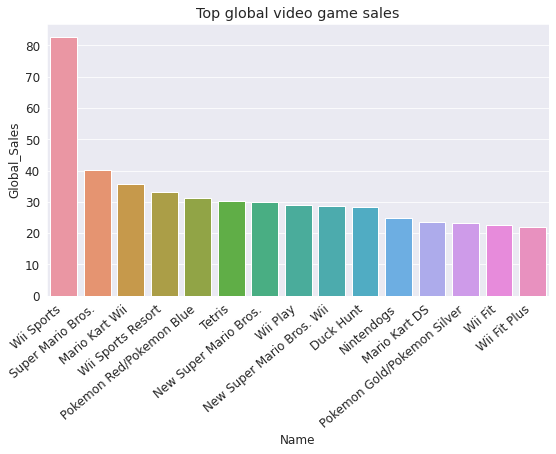

In [9]:
plt.rcParams['font.size'] = 12

plt.title('Top global video game sales')
gb_sales_graph = sns.barplot(x=gb_sales_df.Name, y=gb_sales_df.Global_Sales)

gb_sales_graph.set_xticklabels(gb_sales_graph.get_xticklabels(), rotation=40, ha="right");

Another interesting information from this is that all the top global selling games are from Nintendo. The genre of games do vary so as the year of publishing from 1984-2009 

This information looks strange. What about other publisher and platform? Is Nintendo really dominating the market?

In [30]:
jovian.commit(files=['videogamesales'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sunskung/course-project" on https://jovian.ai
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/sunskung/course-project


'https://jovian.ai/sunskung/course-project'

In [10]:
game_df.Publisher.unique();

In [34]:
game_df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Looks like most of the popular platforms are here like PC, PS4, and Xbox. Also, popular pubisher like Sega, Sony Computer Entertainment, EA, Konami and Square Enix are here too. 

Let's see how they perform!

In [ ]:
jovian.commit(files=['videogamesales'])

<IPython.core.display.Javascript object>

In [14]:
gb_sales_df_no_nintendo = game_df[game_df.Publisher != 'Nintendo']
gb_sales_df_no_nintendo.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03


The data has already been sort by global sales, so we do not need to arrange it. It seems after taking out Nintendo from the picture, popular game start to emerge like COD, GTA and Halo. Looks like these were popular but not the most popular at all. Publishers like Microsoft game studios and Take Two Interactive are here too.

But, what's about PC games? I believe they are quite popular as well. Games like Dota2 , PUBG and CSGO are not here. It has very high concurrent players at steam. My guess is that this dataset does not contain the microtrasaction sales, but only the sales of the copy of the game.

Let's take a look at PC Games.

In [15]:
game_df[game_df.Platform == 'PC'].head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.00,0.00,6.28
181,182,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.00,0.62,5.20
194,195,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1.69,0.00,0.20,5.12
217,218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1.68,0.00,0.59,4.83
267,268,Warcraft II: Tides of Darkness,PC,1995.0,Strategy,Activision,1.70,2.27,0.00,0.23,4.21
281,282,Half-Life,PC,1997.0,Shooter,Vivendi Games,4.03,0.00,0.09,0.00,4.12
288,289,World of Warcraft: The Burning Crusade,PC,2007.0,Role-Playing,Activision,2.57,1.52,0.00,0.00,4.09
310,311,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,Bethesda Softworks,1.15,2.09,0.00,0.64,3.88
328,329,The Sims: Unleashed,PC,2002.0,Simulation,Electronic Arts,2.03,1.56,0.00,0.17,3.76


# ---------------------------------------------------------------

## code sandbox

In [80]:
covid_data_dict= {
    'date': ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases': [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None],
    'Name': ['Dog','Cat','Duck','goose', ""]
}

In [98]:
covid_df = pd.DataFrame(covid_data_dict)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        5 non-null      object 
 1   new_cases   5 non-null      int64  
 2   new_deaths  5 non-null      int64  
 3   new_tests   3 non-null      float64
 4   Name        5 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 328.0+ bytes


In [100]:
covid_df.where(~(covid_df.Name.str.contains('Duc', na=True)), np.nan, inplace=True)

In [101]:
covid_df

,date,new_cases,new_deaths,new_tests,Name
0,2020-08-30,1444.0,1.0,53541.0,Dog
1,2020-08-31,1365.0,4.0,42583.0,Cat
2,NaN,NaN,NaN,NaN,NaN
3,2020-09-02,975.0,8.0,NaN,goose
4,2020-09-03,1326.0,6.0,NaN,


Let's try to clean the data out by removing the row that contain Duck

In [92]:
covid_df.where(~(covid_df.Name == 'Duck'))

,date,new_cases,new_deaths,new_tests,Name
0,2020-08-30,1444.0,1.0,53541.0,Dog
1,2020-08-31,1365.0,4.0,42583.0,Cat
2,NaN,NaN,NaN,NaN,NaN
3,2020-09-02,975.0,8.0,NaN,goose
4,2020-09-03,1326.0,6.0,NaN,


# -----------------------------------------------------------

Now, lets filter out the game that was released later than 2016

In [15]:
game_df['Year'].value_counts().sort_index()


1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Year, dtype: int64

Looks like there are 4 row that is > 2016. Let's remove them

In [14]:
game_df.drop(game_df[game_df.Year > 2016].index, inplace=True)

In [42]:
game_df['Year'].value_counts().sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
Name: Year, dtype: int64

### Which are the top 5 selling games from each regions?

### NA

In [20]:
na_sales_df = game_df.sort_values('NA_Sales', ascending = False).head(15)

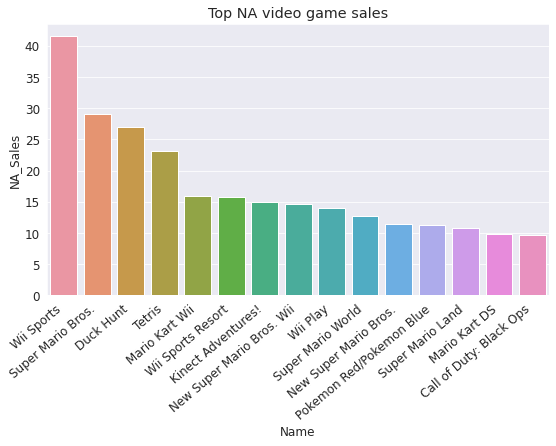

In [22]:
plt.rcParams['font.size'] = 12

plt.title('Top NA video game sales')
na_sales_graph = sns.barplot(x=na_sales_df.Name, y=na_sales_df.NA_Sales)

na_sales_graph.set_xticklabels(na_sales_graph.get_xticklabels(), rotation=40, ha="right");

`Wii Sports, Super Mario Bros., Duck Hunt, Tetris, Mario Kart Wii` are among the top 5 sellin games in NA.

### EU

In [24]:
eu_sales_df = game_df.sort_values('EU_Sales', ascending = False).head(15)

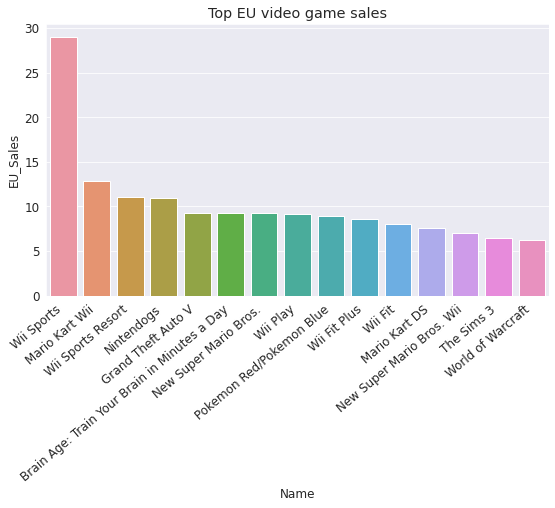

In [25]:
plt.rcParams['font.size'] = 12

plt.title('Top EU video game sales')
eu_sales_graph = sns.barplot(x=eu_sales_df.Name, y=eu_sales_df.EU_Sales)

eu_sales_graph.set_xticklabels(eu_sales_graph.get_xticklabels(), rotation=40, ha="right");

For EU side, looks like the Wii sports is a huge hit there follow by Mario Kart, Wii sport resort, Nintendogs and GTA V

### JP

In [27]:
jp_sales_df = game_df.sort_values('JP_Sales', ascending = False).head(15)

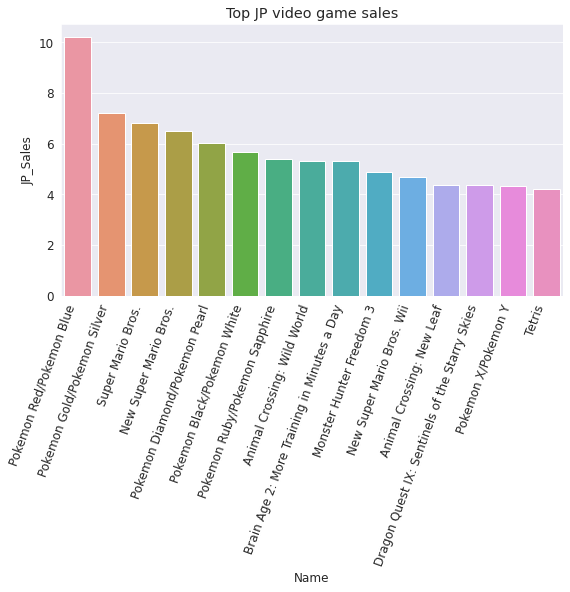

In [37]:
plt.rcParams['font.size'] = 12

plt.title('Top JP video game sales')
JP_sales_graph = sns.barplot(x=jp_sales_df.Name, y=jp_sales_df.JP_Sales)

JP_sales_graph.set_xticklabels(JP_sales_graph.get_xticklabels(), rotation=70, ha="right");

The top selling games are now quite different. Pokemon takes first and second and fifth while super marios takes third and fourth

### Others

In [40]:
others_sales_df = game_df.sort_values('Other_Sales', ascending = False).head(15)

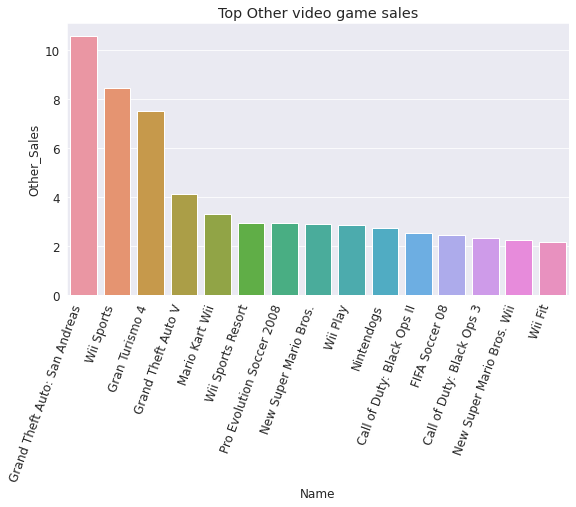

In [41]:
plt.rcParams['font.size'] = 12

plt.title('Top Other video game sales')
Other_sales_graph = sns.barplot(x=others_sales_df.Name, y=others_sales_df.Other_Sales)

Other_sales_graph.set_xticklabels(Other_sales_graph.get_xticklabels(), rotation=70, ha="right");

In [ ]:
jovian.commit(files=['videogamesales'])

<IPython.core.display.Javascript object>

###  Which genre of game are the most popular(highest selling)?

In [16]:
game_genre_sales = game_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False)

Looks like the Action, Sports, and shooter are very popular.

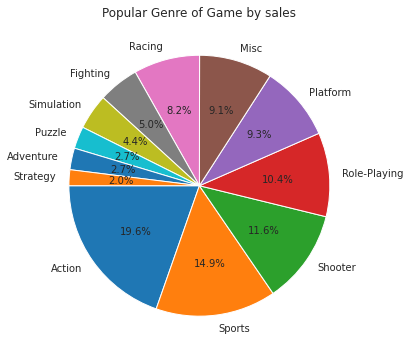

In [25]:
plt.figure(figsize=(12,6))
plt.title('Popular Genre of Game by sales')
plt.pie(game_genre_sales, labels=game_genre_sales.index, autopct='%1.1f%%', startangle=180);

In [ ]:
jovian.commit(files=['videogamesales'])

<IPython.core.display.Javascript object>

### What is the top 5 publishers by sales and show their top 3 selling games and What are the sales of top 5 publishers?

In [74]:
top5_publishers = game_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(30)
top5_publishers

Publisher
Nintendo                                  1786.56
Electronic Arts                           1110.32
Activision                                 727.46
Sony Computer Entertainment                607.50
Ubisoft                                    474.43
Take-Two Interactive                       399.54
THQ                                        340.77
Konami Digital Entertainment               283.64
Sega                                       272.95
Namco Bandai Games                         254.09
Microsoft Game Studios                     245.79
Capcom                                     200.89
Atari                                      157.22
Warner Bros. Interactive Entertainment     153.89
Square Enix                                145.18
Disney Interactive Studios                 119.96
Eidos Interactive                           98.98
LucasArts                                   87.34
Bethesda Softworks                          82.14
Midway Games                            

Looks like Nintendo, EA, Activision, Sony and Ubisoft take the top 5 spot

In [66]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

<AxesSubplot:title={'center':'Publsihers by Sales'}, xlabel='Global_Sales', ylabel='Publisher'>

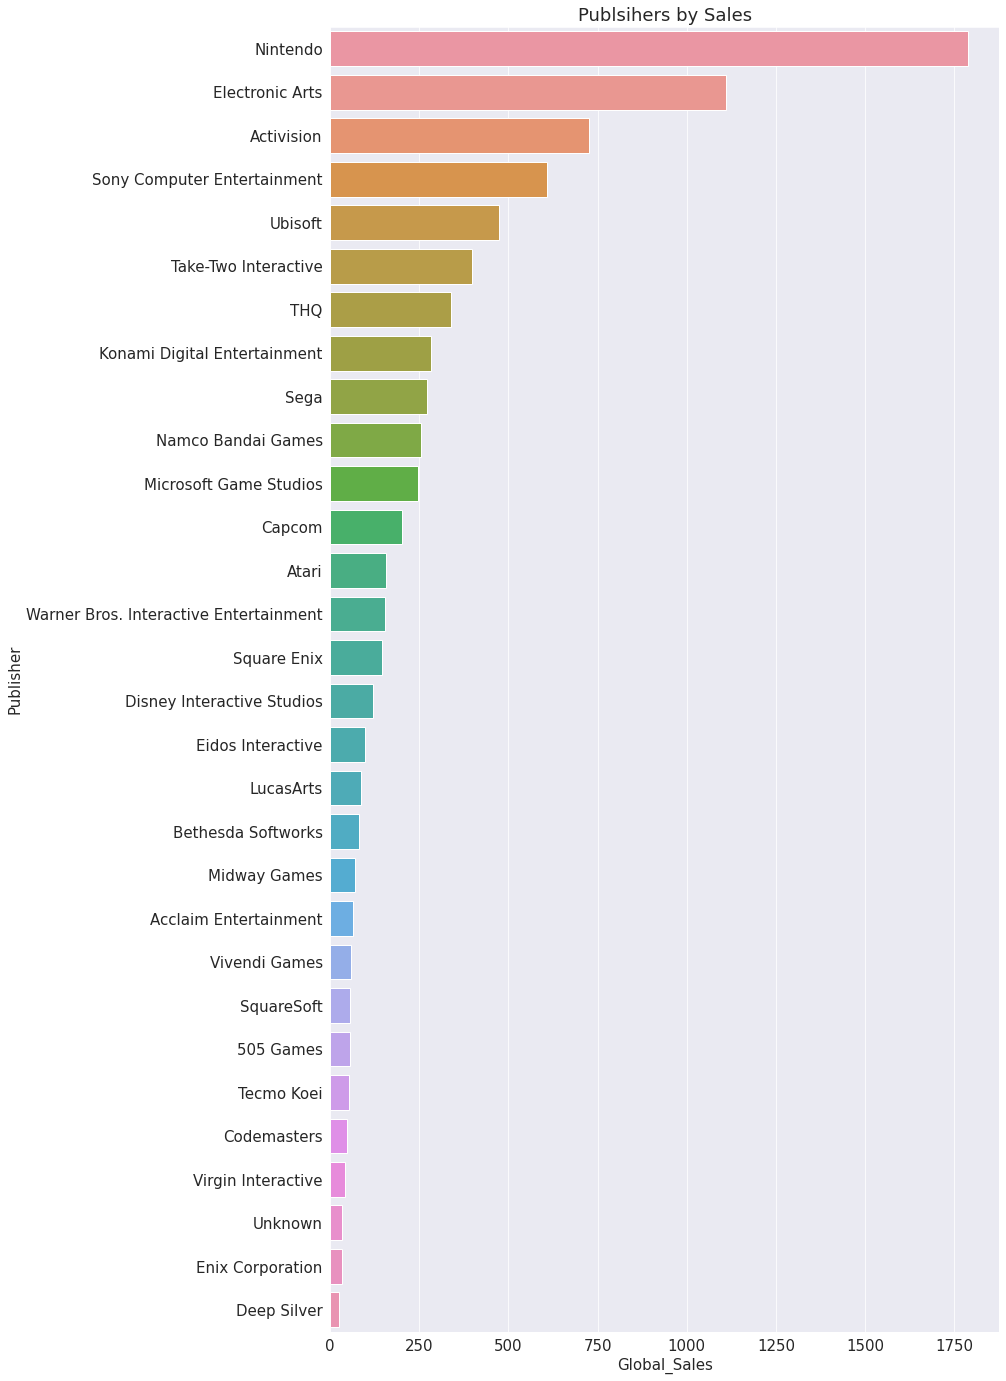

In [75]:
plt.rcParams['font.size'] = 15
plt.figure(figsize=(12,24))
plt.title('Publsihers by Sales')
sns.barplot(x=top5_publishers, y=top5_publishers.index)

In [32]:
jovian.commit(files=['videogamesales'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sunskung/course-project" on https://jovian.ai
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/sunskung/course-project


'https://jovian.ai/sunskung/course-project'

### Best selling games from 5 recent years?

In [21]:
best_selling_5 = game_df[game_df.Year >= (2016-5)].sort_values('Global_Sales')

In [22]:
best_selling_5

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16204,16207,Ro-Kyu-Bu! Secret Photo Op,PSV,2014.0,Adventure,Kadokawa Games,0.00,0.00,0.01,0.00,0.01
16203,16206,Shin Hayarigami 2,PSV,2016.0,Adventure,Nippon Ichi Software,0.00,0.00,0.01,0.00,0.01
16202,16205,Hakuoki: Reimeiroku DS,DS,2012.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16201,16204,Adventure Time: The Secret of the Nameless,X360,2014.0,Adventure,Little Orbit,0.01,0.00,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
32,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38


The data shows us from the year 2011-2016 the top 5 best selling games are `GTA V(PS3 and Xbox360), COD MW3, PokemonX/Y and COD Black ops 3`

In [20]:
best_selling_5.sort_values('Global_Sales').drop_duplicates('Year',keep='last')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40


In [40]:
best_selling_5_filtered = best_selling_5.drop_duplicates(['Year', 'Global_Sales']).groupby('Year').tail(3).sort_values('Year')
best_selling_5_filtered

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
42,43,Mario Kart 7,3DS,2011.0,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
64,65,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,3.07,2.47,0.63,9.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
32,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98


<Figure size 864x864 with 0 Axes>

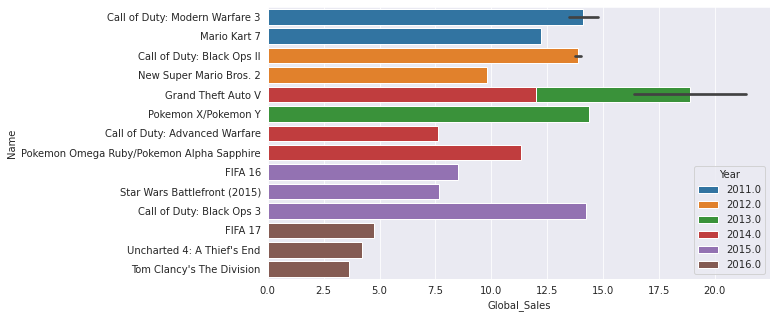

<Figure size 864x864 with 0 Axes>

In [85]:
best_selling_5_bar = sns.barplot(x = best_selling_5_filtered.Global_Sales, y = best_selling_5_filtered.Name, hue= best_selling_5_filtered.Year,dodge=False);

plt.rcParams['font.size'] = 10
plt.setp(best_selling_5_bar.get_legend().get_texts(), fontsize='10');
plt.figure(figsize=(12,12))

Now, we have the data for the year 2011-2016 and shows the top 3 games for the following years with sales amount.

`2013` seems to be the years with `highest sales`, and the game which reach that amount `GTA V` while the `lowest` seems to be from the year `2016.` and highest selling game are `FIFA 17`

In [ ]:
jovian.commit(files=['videogamesales'])

<IPython.core.display.Javascript object>

### Summary and Conclusion

- Findings and insights from the game sales dataset.

1. Some values are missing from Year and Publisher
2. game with highest global sales are `Wii Sports, Super Mario Bros., Mario Kart Wii, Wii Sports Resort, Pokemon Red&Blue.`
3. This dataset does not show the microtransaction sales but onlt the digital copy sales
4. The data range from `1980-2016`. There are some data from the year 2017 and 2020, but that is not enough to make an analysis
5. From the last 5 recent year(2011-2016), 2013 has the highest sales while 2016 is the lowest
6. `Nintendo, EA, Activision` are the publishers with highest amount of sales globally.
7. Obtain information of the highest sales from each regions like NA, EU, JP and others. Also the genre of games that each regions like to play.
8. The genre of game with highest sales from 1980-2016 are `Actions, Sports, and Shooters.`
9. The highest amount of game being released was around `2008 to 2010` which covers around `1200+ games`.

In [3]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sunskung/course-project1-for-submission" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sunskung/course-project1-for-submission
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
